In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV3Large
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import random
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

2025-07-13 19:41:56.682430: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752435717.072745      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752435717.183949      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import kagglehub
path = kagglehub.dataset_download("mohammedabdeldayem/the-fake-or-real-dataset")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-fake-or-real-dataset


In [3]:
def filter_broken_files(files, labels):
    good_files = []
    good_labels = []
    for file, label in zip(files, labels):
        try:
            _ = librosa.load(file, sr = 16000, mono = True)
            good_files.append(file)
            good_labels.append(label)

        except Exception as ex:
            print(f"Broken file skipped {file}: {ex}")

    return np.array(good_files), np.array(good_labels)

def get_files_labels(real_path, fake_path, extensions = (".wav", ".mp3")):
    real_files = []
    fake_files = []

    for ext in extensions:
        real_files.extend(tf.io.gfile.glob(os.path.join(real_path, f"*{ext}")))
        fake_files.extend(tf.io.gfile.glob(os.path.join(fake_path, f"*{ext}")))

    real_labels = [1] * len(real_files)
    fake_labels = [0] * len(fake_files)

    all_files = real_files + fake_files
    all_labels = real_labels + fake_labels

    return np.array(all_files), np.array(all_labels)

In [4]:
train_path = "/kaggle/input/the-fake-or-real-dataset/for-original/for-original/training"
test_path = "/kaggle/input/the-fake-or-real-dataset/for-original/for-original/testing"
val_path = "/kaggle/input/the-fake-or-real-dataset/for-original/for-original/validation"

files_train, labels_train = get_files_labels(os.path.join(train_path, "real"), os.path.join(train_path, "fake"))
files_val, labels_val = get_files_labels(os.path.join(val_path, "real"), os.path.join(val_path, "fake"))
files_test, labels_test = get_files_labels(os.path.join(test_path, "real"), os.path.join(test_path, "fake"))

files_train_filtered, labels_train_filtered = filter_broken_files(files_train, labels_train)
files_val_filtered, labels_val_filtered = filter_broken_files(files_val, labels_val)
files_test_filtered, labels_test_filtered = filter_broken_files(files_test, labels_test)

train_ds = tf.data.Dataset.from_tensor_slices((files_train_filtered, labels_train_filtered))
val_ds = tf.data.Dataset.from_tensor_slices((files_val_filtered, labels_val_filtered))
test_ds = tf.data.Dataset.from_tensor_slices((files_test_filtered, labels_test_filtered))

/tmp/ipykernel_19/674761242.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  _ = librosa.load(file, sr = 16000, mono = True)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Broken file skipped /kaggle/input/the-fake-or-real-dataset/for-original/for-original/training/fake/file17407.mp3: 


Note: Illegal Audio-MPEG-Header 0x00000000 at offset 50.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


Broken file skipped /kaggle/input/the-fake-or-real-dataset/for-original/for-original/training/fake/file19851.mp3: 


/tmp/ipykernel_19/674761242.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  _ = librosa.load(file, sr = 16000, mono = True)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Broken file skipped /kaggle/input/the-fake-or-real-dataset/for-original/for-original/training/fake/file5323.mp3: 


Note: Illegal Audio-MPEG-Header 0x00000000 at offset 50.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


Broken file skipped /kaggle/input/the-fake-or-real-dataset/for-original/for-original/training/fake/file31017.mp3: 


/tmp/ipykernel_19/674761242.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  _ = librosa.load(file, sr = 16000, mono = True)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Broken file skipped /kaggle/input/the-fake-or-real-dataset/for-original/for-original/training/fake/file32972.mp3: 
Broken file skipped /kaggle/input/the-fake-or-real-dataset/for-original/for-original/training/fake/file27839.mp3: 


Note: Illegal Audio-MPEG-Header 0x00000000 at offset 50.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


Broken file skipped /kaggle/input/the-fake-or-real-dataset/for-original/for-original/training/fake/file16643.mp3: 


/tmp/ipykernel_19/674761242.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  _ = librosa.load(file, sr = 16000, mono = True)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Broken file skipped /kaggle/input/the-fake-or-real-dataset/for-original/for-original/training/fake/file27643.mp3: 
Broken file skipped /kaggle/input/the-fake-or-real-dataset/for-original/for-original/training/fake/file9875.mp3: 
Broken file skipped /kaggle/input/the-fake-or-real-dataset/for-original/for-original/training/fake/file13424.mp3: 
Broken file skipped /kaggle/input/the-fake-or-real-dataset/for-original/for-original/training/fake/file27206.mp3: 
Broken file skipped /kaggle/input/the-fake-or-real-dataset/for-original/for-original/training/fake/file15746.mp3: 
Broken file skipped /kaggle/input/the-fake-or-real-dataset/for-original/for-original/training/fake/file17450.mp3: 
Broken file skipped /kaggle/input/the-fake-or-real-dataset/for-original/for-original/training/fake/file30959.mp3: 
Broken file skipped /kaggle/input/the-fake-or-real-dataset/for-original/for-original/validation/fake/file31606.mp3: 
Broken file skipped /kaggle/input/the-fake-or-real-dataset/for-original/for-ori

I0000 00:00:1752436747.669210      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1752436747.669984      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [5]:
def load_wav(filename):
    ext = os.path.splitext(filename)[-1].lower()
    if ext not in [".wav", ".mp3"]:
        raise ValueError(f"Unsupported file format: {ext}")
    
    wav, sample_rate = librosa.load(filename, sr = 16000, mono = True)
    return wav, sample_rate

def preprocess_audio(file_path, label, mode='train'):
    if isinstance(file_path, tf.Tensor):
        file_path = file_path.numpy().decode('utf-8')

    wav, sample_rate = load_wav(file_path)
    target_length = 48000

    if len(wav) < target_length:
        pad_total = target_length - len(wav)
        pad_left = pad_total // 2
        pad_right = pad_total - pad_left
        wav = np.pad(wav, (pad_left, pad_right))
    else:
        start = random.randint(0, len(wav) - target_length) if mode == 'train' else (len(wav) - target_length) // 2
        wav = wav[start:start + target_length]

    spectrogram = librosa.feature.melspectrogram(y=wav, sr=16000, n_fft=1024, hop_length=512, n_mels=128)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max, top_db=80.0)
    spectrogram_db = (spectrogram_db + 80) / 80
    spectrogram_db = tf.expand_dims(spectrogram_db, axis=-1)
    spectrogram_db = tf.cast(spectrogram_db, tf.float32)
    label = tf.cast(label, tf.int32)

    return spectrogram_db, label

def train_preprocess_wrapper(file_path, label):
    spectrogram, label = tf.py_function(preprocess_audio, [file_path, label, 'train'], [tf.float32, tf.int32])
    spectrogram.set_shape([None, None, 1])
    label.set_shape([])
    return spectrogram, label

def val_test_preprocess_wrapper(file_path, label):
    spectrogram, label = tf.py_function(preprocess_audio, [file_path, label, 'val_test'], [tf.float32, tf.int32])
    spectrogram.set_shape([None, None, 1])
    label.set_shape([])
    return spectrogram, label

In [6]:
def create_dataset(dataset, batch_size=32, shuffle=True, mode='train'):
    if shuffle:
        dataset = dataset.shuffle(buffer_size=10000)

    if(mode=='train'):
      dataset = dataset.map(train_preprocess_wrapper, num_parallel_calls=tf.data.AUTOTUNE)
    else:
      dataset = dataset.map(val_test_preprocess_wrapper, num_parallel_calls=tf.data.AUTOTUNE)

    dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

    return dataset

In [7]:
train_ds = create_dataset(train_ds, batch_size=32, shuffle=True, mode='train')
val_ds = create_dataset(val_ds, batch_size=32, shuffle=False, mode='val')
test_ds = create_dataset(test_ds, batch_size=32, shuffle=False, mode='test')

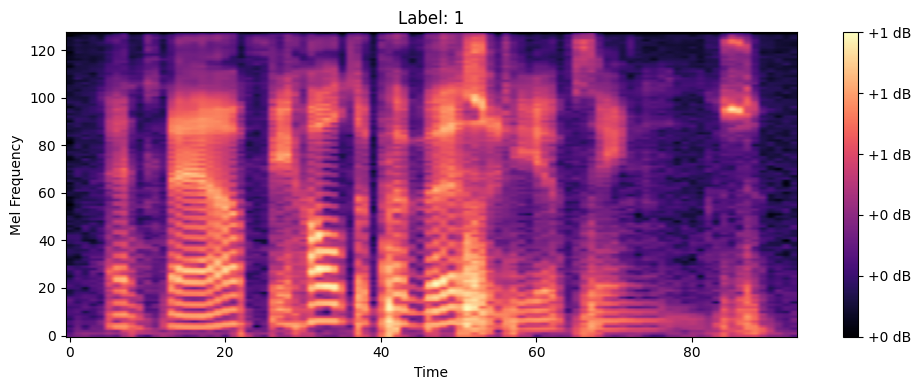

In [8]:
for spectrograms, labels in train_ds.take(1):
    idx = np.random.randint(0, spectrograms.shape[0])

    spec = spectrograms[idx].numpy().squeeze()
    label = labels.numpy()[idx]

    plt.figure(figsize=(10, 4))
    plt.imshow(spec, aspect='auto', origin='lower', cmap='magma')
    plt.title(f"Label: {label}")
    plt.xlabel("Time")
    plt.ylabel("Mel Frequency")
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.show()

In [9]:
samples, labels = train_ds.as_numpy_iterator().next()
print(samples.shape)
input_shape = samples.shape[1::]
print(input_shape)

(32, 128, 94, 1)
(128, 94, 1)


In [10]:
def preprocess_mel_spectrogram(mel_spectrogram):
    mel_spectrogram = tf.image.resize(mel_spectrogram, (224, 224))
    mel_spectrogram = tf.repeat(mel_spectrogram, 3, axis = -1)
    return mel_spectrogram

In [11]:
def MobileSeqDetect(input_shape = (128, 94, 1)):

    inputs = layers.Input(shape = input_shape, name = 'input_mel_spectrogram')
    x = layers.Lambda(preprocess_mel_spectrogram)(inputs)

    backbone = MobileNetV3Large(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    backbone.trainable = False
    x = backbone(x)

    x = layers.Reshape((49, 960))(x)

    x = layers.Bidirectional(layers.LSTM(256, return_sequences = True))(x)

    attention_output = layers.Attention()([x, x])
    x = layers.GlobalAveragePooling1D()(attention_output)

    x = layers.Dense(256, activation = 'relu', kernel_regularizer = keras.regularizers.l2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Dense(256, activation = 'relu', kernel_regularizer = keras.regularizers.l2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(1, activation = 'sigmoid', name = 'output')(x)

    model = keras.models.Model(inputs = inputs, outputs = outputs)
    return model

In [12]:
modelMobileSeqDetect = MobileSeqDetect()

modelMobileSeqDetect.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.001),
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])

checkpoint = keras.callbacks.ModelCheckpoint(filepath = "MobileSeqDetect.weights.h5", monitor = 'val_loss', save_best_only = True,
                                            save_weights_only = True, mode = 'min', verbose = 1)

reduce_lr_on_plateau = keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5, patience = 5, min_lr = 1e-6, verbose = 1)

early_stopping = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights = True)

callbacks = [checkpoint, reduce_lr_on_plateau, early_stopping]

modelMobileSeqDetect_history = modelMobileSeqDetect.fit(train_ds, validation_data = val_ds, epochs = 20, callbacks = callbacks)

modelMobileSeqDetect.save('/kaggle/working/MobileSeqDetect.keras')
with open('/kaggle/working/MobileSeqDetect.pkl', 'wb') as f:
    pickle.dump(modelMobileSeqDetect_history.history, f)

12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20


I0000 00:00:1752436767.748977     144 cuda_dnn.cc:529] Loaded cuDNN version 90300


1684/1684 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step - accuracy: 0.9131 - loss: 0.2800
Epoch 1: val_loss improved from inf to 42.02926, saving model to MobileSeqDetect.weights.h5
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 943s 550ms/step - accuracy: 0.9131 - loss: 0.2800 - val_accuracy: 0.5001 - val_loss: 42.0293 - learning_rate: 0.0010
Epoch 2/20
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step - accuracy: 0.8804 - loss: 0.3904
Epoch 2: val_loss did not improve from 42.02926
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 926s 550ms/step - accuracy: 0.8804 - loss: 0.3903 - val_accuracy: 0.5001 - val_loss: 92.6641 - learning_rate: 0.0010
Epoch 3/20
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step - accuracy: 0.9112 - loss: 0.3076
Epoch 3: val_loss did not improve from 42.02926
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 928s 551ms/step - accuracy: 0.9112 - loss: 0.3075 - val_accuracy: 0.5001 - val_loss: 86.2665 - learning_rate: 0.0010
Epoch 4/20
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.9163 - loss: 0.2931
Epoch 4: val_loss i

In [13]:
# modelMobileSeqDetect.load_weights("/kaggle/input/mobileseqdetect/other/default/1/MobileSeqDetect/MobileSeqDetect.weights.h5")
# with open('/kaggle/input/mobileseqdetect/other/default/1/MobileSeqDetect/MobileSeqDetect.pkl', 'rb') as f:
#     modelMobileSeqDetect_history = pickle.load(f)

In [14]:
def plotResults(history, model_name = 'Model'):
    metrics = ['accuracy', 'loss']
    val_metrics = ['val_accuracy', 'val_loss']

    epochs = range(1, len(history['loss']) + 1)

    fig, axes = plt.subplots(1, 2, figsize=(25, 5))

    for i, (metric, val_metric) in enumerate(zip(metrics, val_metrics)):
        ax = axes[i]
        ax.plot(epochs, history[metric], label=f'Train {metric}')
        ax.plot(epochs, history[val_metric], label=f'Val {metric}')
        ax.set_title(metric)
        ax.set_xlabel('Epochs')
        ax.set_ylabel(metric)
        ax.legend()

    plt.suptitle(model_name, fontsize = 16)
    plt.tight_layout()
    plt.show()

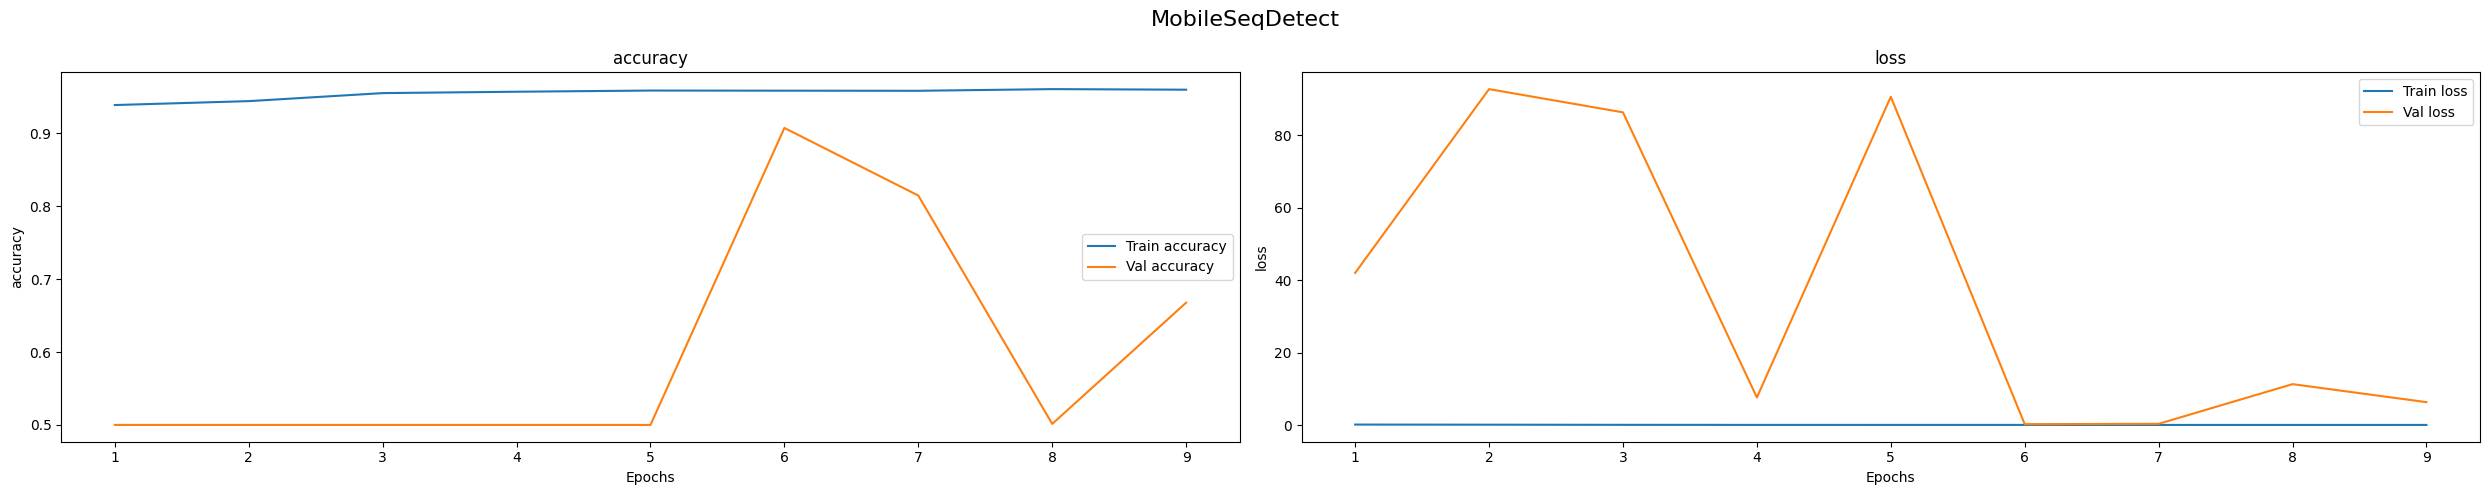

In [15]:
plotResults(modelMobileSeqDetect_history.history, model_name = 'MobileSeqDetect')

In [16]:
evaluation = modelMobileSeqDetect.evaluate(test_ds)
predicted = modelMobileSeqDetect.predict(test_ds)
predicted_labels = (predicted > 0.5).astype(int).flatten()
grouth_true_labels = np.concatenate([y for x, y in test_ds], axis = 0)

accuracy = metrics.accuracy_score(grouth_true_labels, predicted_labels)
precision = metrics.precision_score(grouth_true_labels, predicted_labels, average = 'weighted')
f1 = metrics.f1_score(grouth_true_labels, predicted_labels, average = 'weighted')
recall = metrics.recall_score(grouth_true_labels, predicted_labels, average = 'weighted')
roc_auc = metrics.roc_auc_score(grouth_true_labels, predicted_labels, average = 'weighted')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"F1: {f1}")
print(f"Recall: {recall}")
print(f"ROC_AUC: {roc_auc}")

145/145 ━━━━━━━━━━━━━━━━━━━━ 67s 458ms/step - accuracy: 0.6806 - loss: 1.0131
145/145 ━━━━━━━━━━━━━━━━━━━━ 72s 479ms/step
Accuracy: 0.7190332326283988
Precision: 0.7201234585451705
F1: 0.7182289805796389
Recall: 0.7190332326283988
ROC_AUC: 0.7178983838022395


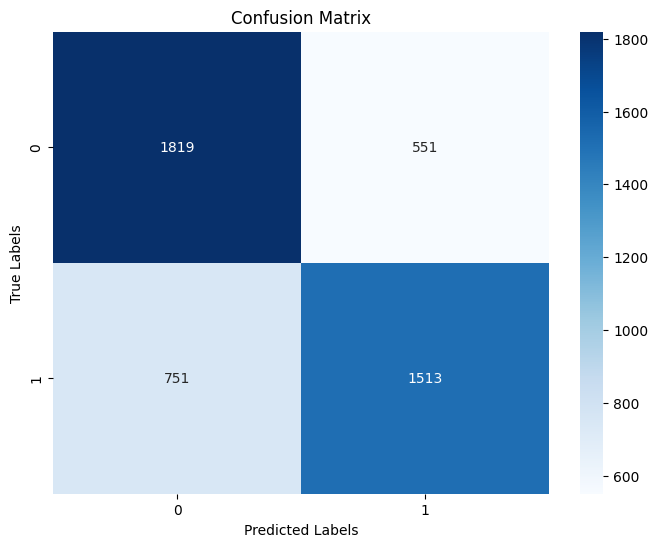

In [17]:
confusion_matrix = metrics.confusion_matrix(grouth_true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [18]:
def inference(model, file_path):
    wav, sr = load_wav(file_path)
    target_length = 48000
    
    if len(wav) < target_length:
        pad_total = target_length - len(wav)
        pad_left = pad_total // 2
        pad_right = pad_total - pad_left
        wav = np.pad(wav, (pad_left, pad_right))
    else:
        start = random.randint(0, (len(wav) - target_length) // 2)
        wav = wav[start:start + target_length]
            
    spectrogram = librosa.feature.melspectrogram(y = wav, sr = 16000, n_fft = 1024, hop_length = 512, n_mels = 128)
    spectrogram_db = librosa.power_to_db(spectrogram, ref = np.max, top_db = 80.0)
    spectrogram_db = (spectrogram_db + 80) / 80
    spectrogram_db = tf.expand_dims(spectrogram_db, axis  = -1)
    spectrogram_db = tf.cast(spectrogram_db, tf.float32)
    spectrogram_db = tf.expand_dims(spectrogram_db, axis=0)
        
    pred = model(spectrogram_db, training = False)
    predicted_label = tf.cast(pred > 0.5, tf.int32).numpy().flatten()[0]
    
    return f"Final prediction: {'Fake' if predicted_label == 0 else 'Real'}"

In [19]:
inference(modelMobileSeqDetect, "/kaggle/input/the-fake-or-real-dataset/for-original/for-original/testing/real/file1.wav")

'Final prediction: Real'